<a href="https://colab.research.google.com/github/RawanZagh/Colab-Test/blob/main/Working_with_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch; torch.manual_seed(0)
import matplotlib.pyplot as plt

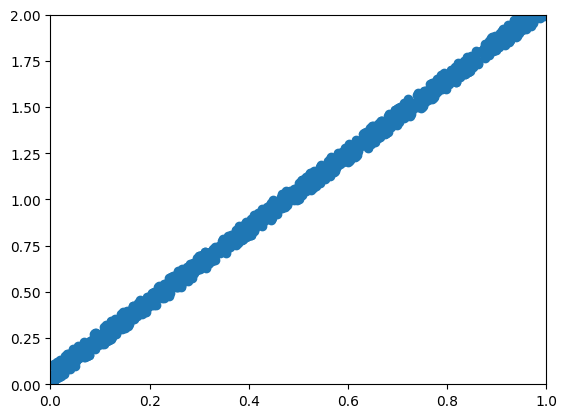

In [ ]:
# Data genearation and visualization.
x = torch.rand(1000, 1)
y = 2 * x + 0.1 * torch.rand(x.size())

plt.scatter(x.data.numpy(), y.data.numpy())
plt.xlim(0, 1)
plt.ylim(0, 2)
plt.show()

In [ ]:
# Network structure.
class MyNNet(torch.nn.Module):
    def __init__(self, n_hidden):
        super(MyNNet, self).__init__()
        self.hidden = torch.nn.Linear(1, n_hidden)  # the single hidden layer
        self.relu = torch.nn.ReLU()                # activation function
        self.output = torch.nn.Linear(n_hidden, 1)  # output layer

    def forward(self, x):
        out = self.hidden(x)
        out = self.relu(out)
        out = self.output(out)
        return out

In [ ]:
# Set up model and training components.
n_epoch = 10  # rounds of learning
learning_rate = 0.001

model = MyNNet(10)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  # adjusts the parameters
loss_func = torch.nn.MSELoss()  # calculates the loss

In [ ]:
# Start training.
for epoch in range(n_epoch):
    for i in range(x.size()[0]):
        y_pred = model(x[i])  # forward pass
        loss = loss_func(y_pred, y[i])

        optimizer.zero_grad()  # clear gradients for next pass
        loss.backward()  # backward pass
        optimizer.step()  # adjust parameters

    print(f'Epoch {epoch + 1}. Loss: {loss.item():.4f}')

Epoch 1. Loss: 0.0170
Epoch 2. Loss: 0.0061
Epoch 3. Loss: 0.0012
Epoch 4. Loss: 0.0001
Epoch 5. Loss: 0.0001
Epoch 6. Loss: 0.0006
Epoch 7. Loss: 0.0012
Epoch 8. Loss: 0.0018
Epoch 9. Loss: 0.0022
Epoch 10. Loss: 0.0025


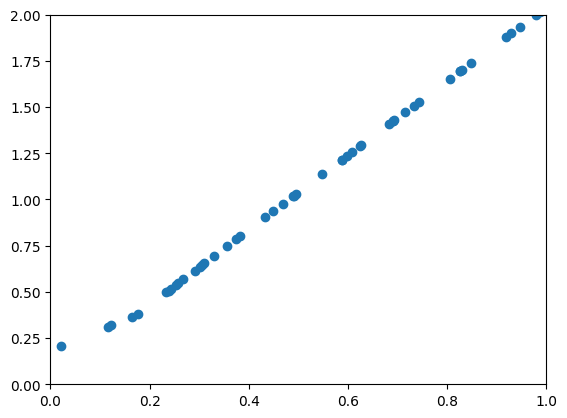

In [ ]:
x_test = torch.rand(50, 1)
y_pred = []
with torch.no_grad():
    for i in range(x_test.size()[0]):
        y_pred.append(model(x_test[i]).item())

plt.scatter(x_test.data.numpy(), y_pred)
plt.xlim(0, 1)
plt.ylim(0, 2)
plt.show()

In [ ]:
for param_tensor in model.state_dict():
    print(param_tensor)
    print(model.state_dict()[param_tensor])
    print()

hidden.weight
tensor([[ 0.5547],
        [ 0.1284],
        [ 0.1526],
        [ 0.6374],
        [ 1.0640],
        [-0.4040],
        [-0.1096],
        [ 0.5825],
        [-0.4846],
        [ 1.3240]])

hidden.bias
tensor([-0.6850,  0.4552, -0.7183,  0.1971,  0.4783,  0.1762, -0.1002,  0.5312,
        -0.7180, -0.2322])

output.weight
tensor([[-0.2695, -0.1310,  0.0082,  0.3098,  0.7014, -0.1078,  0.2632,  0.2117,
         -0.0865,  0.7219]])

output.bias
tensor([-0.2447])



In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
torch.save(model.state_dict(), '/content/gdrive/My Drive/sample.pth')

In [ ]:
model = MyNNet(10)
model.load_state_dict(torch.load('/content/gdrive/My Drive/sample.pth'))
model.eval()

MyNNet(
  (hidden): Linear(in_features=1, out_features=10, bias=True)
  (relu): ReLU()
  (output): Linear(in_features=10, out_features=1, bias=True)
)

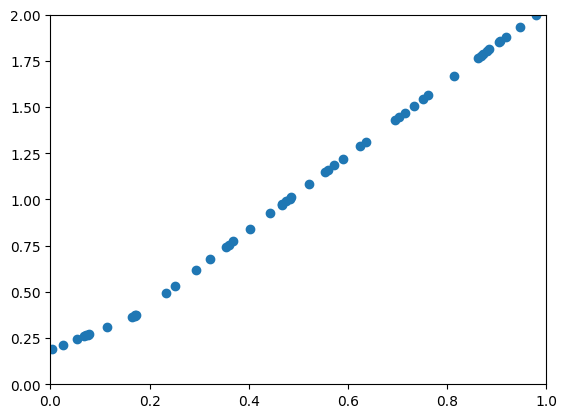

In [ ]:
x_test = torch.rand(50, 1)
y_pred = []
with torch.no_grad():
    for i in range(x_test.size()[0]):
        y_pred.append(model(x_test[i]).item())

plt.scatter(x_test.data.numpy(), y_pred)
plt.xlim(0, 1)
plt.ylim(0, 2)
plt.show()

In [ ]:
# Set up model and training components (version 2).
n_epoch = 15  # rounds of learning
learning_rate = 0.01

model = MyNNet(15)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  # adjusts the parameters
loss_func = torch.nn.MSELoss()  # calculates the loss

In [ ]:
# Start training.
for epoch in range(n_epoch):
    if epoch == 10:
        break

    for i in range(x.size()[0]):
        y_pred = model(x[i])  # forward pass
        loss = loss_func(y_pred, y[i])

        optimizer.zero_grad()  # clear gradients for next pass
        loss.backward()  # backward pass
        optimizer.step()  # adjust parameters

    print(f'Epoch {epoch + 1}. Loss: {loss.item():.4f}')

Epoch 1. Loss: 0.0027
Epoch 2. Loss: 0.0027
Epoch 3. Loss: 0.0026
Epoch 4. Loss: 0.0026
Epoch 5. Loss: 0.0026
Epoch 6. Loss: 0.0025
Epoch 7. Loss: 0.0025
Epoch 8. Loss: 0.0024
Epoch 9. Loss: 0.0024
Epoch 10. Loss: 0.0024


In [ ]:
torch.save({
    'epoch': epoch,
    'model_state_dict': model.state_dict(),
    'optimizer_state_dict': optimizer.state_dict(),
    'loss': loss
}, '/content/gdrive/My Drive/sample_v2.tar')

In [ ]:
model = MyNNet(15)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

checkpoint = torch.load('/content/gdrive/My Drive/sample_v2.tar')
model.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
temp_epoch = checkpoint['epoch']
loss = checkpoint['loss']

print(temp_epoch)
print(loss)

10
tensor(0.0024, requires_grad=True)


In [ ]:
# Start training.
model.train()
for epoch in range(temp_epoch, n_epoch):
    for i in range(x.size()[0]):
        y_pred = model(x[i])  # forward pass
        loss = loss_func(y_pred, y[i])

        optimizer.zero_grad()  # clear gradients for next pass
        loss.backward()  # backward pass
        optimizer.step()  # adjust parameters

    print(f'Epoch {epoch + 1}. Loss: {loss.item():.4f}')

Epoch 11. Loss: 0.0023
Epoch 12. Loss: 0.0023
Epoch 13. Loss: 0.0023
Epoch 14. Loss: 0.0022
Epoch 15. Loss: 0.0022
